# Node Tuning

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np   
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

import kerastuner as kt # for tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [18]:
df = pd.read_csv('diabetes.csv')
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [40]:
def build_model(hp):
    model = Sequential()

    units = hp.Int('numberOfNodes',
                   min_value = 8, # initial value
                   max_value = 128, # last value
                   step = 8 # jump
                   )
    initializer = tf.keras.initializers.he_normal
    model.add(
        Dense(units=units,activation = 'relu',input_dim = 8,kernel_initializer = initializer))
    model.add(
        Dense(1,activation = 'sigmoid'))

    model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

    return model


In [41]:
tuner = kt.RandomSearch(hypermodel=build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='tuner',
                        project_name = 'notetuning'
                        )

INFO:tensorflow:Reloading Tuner from tuner\notetuning\tuner0.json


In [42]:
tuner.search(X_train,y_train,epochs = 5,validation_data = (X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [43]:
# for best parameters
tuner.get_best_hyperparameters()[0].values

{'numberOfNodes': 112}

In [44]:
# to directly extract model from hyperparameter tuning...........
model = tuner.get_best_models(num_models=1)[0]
model

In [45]:
# Training model
history = model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
18/18 [==============================] - 1s 17ms/step - loss: 0.7209 - accuracy: 0.6493 - val_loss: 0.7432 - val_accuracy: 0.5938
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6706 - accuracy: 0.6823 - val_loss: 0.6459 - val_accuracy: 0.7083
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6010 - accuracy: 0.6944 - val_loss: 0.6266 - val_accuracy: 0.6927
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5953 - accuracy: 0.7066 - val_loss: 0.6075 - val_accuracy: 0.7083
Epoch 11/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5719 - accuracy: 0.7222 - val_loss: 0.6115 - val_accuracy: 0.7083
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.7135 - val_loss: 0.6372 - val_accuracy: 0.6927
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.6962 - val_loss: 0.6294 - val_accuracy: 0.6979
Epoch 14

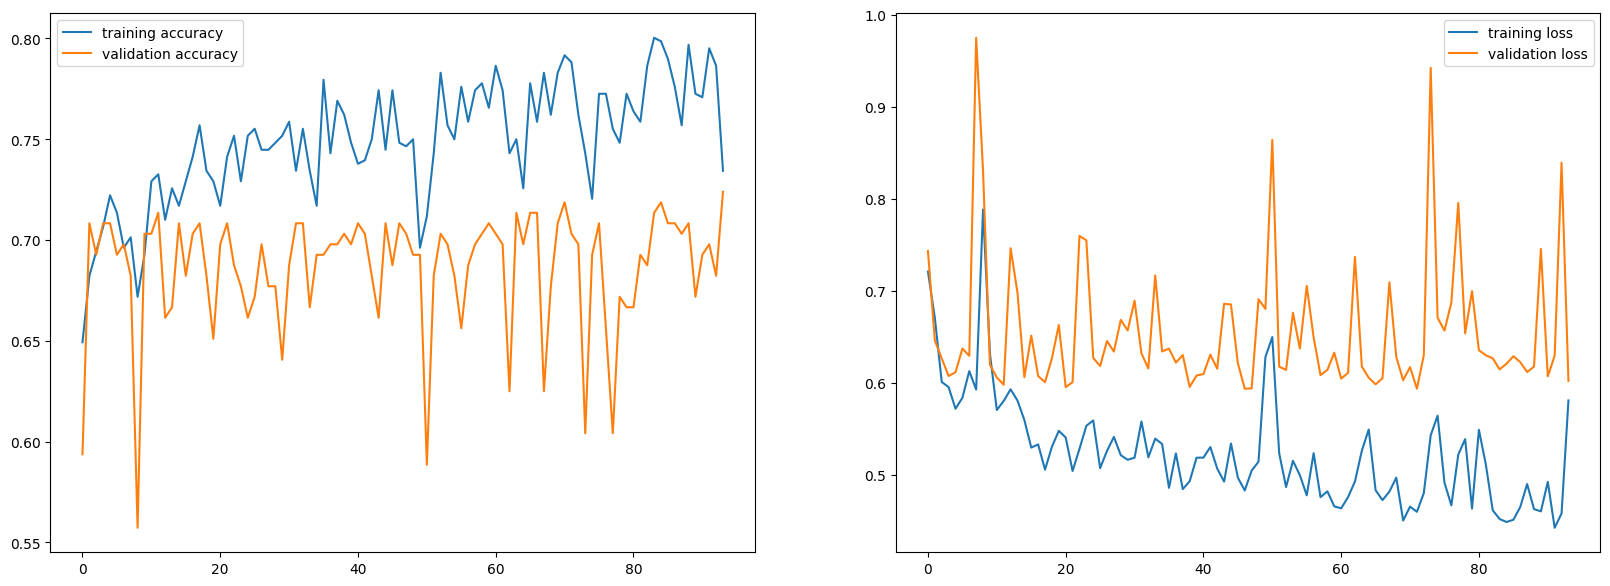

In [46]:
plt.subplots(nrows=1,ncols=2,figsize = (20,7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy','validation accuracy'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss','validation loss'])
